In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# **PUSTAKA** _MyConvexHull_

In [3]:
# Fungsi utama berparameter points (array of point) dan mengembalikan titik-titik pembentuk Convex Hull
def ConvexHull(points):
    # BASIS: Jika hanya ada dua titik, kembalikan keduanya
    if (len(points) <= 2):
        return points

    # Lakukan pengurutan membesar berdasarkan nilai x
    # Jika nilai x sama, urutkan nilai y membesar
    sort = sorted(points, key=lambda x:(x[0], x[1]))

    # Ambil titik paling kiri dan paling kanan
    p1 = sort[0]
    p2 = sort[-1]

    # Kedua titik menjadi pembentuk Convex Hull
    hull = [p1, p2]

    # Hapus kedua titik dari kumpulan titik agar tidak diperiksa lagi
    sort.pop(0)
    sort.pop(-1)

    # DIVIDE
    # Titik p1 dan p2 membentuk garis
    # Pisahkan titik-titik yang berada di atas dan bawah garis tersebut
    above, below = createSegment(p1, p2, sort)

    # CONQUER
    # Gabungkan hasil pemeriksaan segmen atas dan bawah
    hull += findHull(p1, p2, above, "above")
    hull += findHull(p1, p2, below, "below")

    # Menghapus titik yang muncul dua kali/duplikat
    hull = (np.unique(np.asarray(hull), axis=0)).tolist()

    # Mengurutkan titik untuk keperluan plotting
    hull = sortHull(hull)

    return hull

# Fungsi sampingan untuk memeriksa setiap segmen
# p1p2 adalah garis yang akan menjadi acuan
# segment adalah kumpulan titik yang akan diperiksa
# flag bernilai "above" atau "below"
def findHull(p1, p2, segment, flag):
    # Jika tidak ada titik di dalam segmen, kembalikan array kosong
    if (len(segment) == 0):
        return []
    
    # Inisialisasi
    hull = []
    farthest_distance = -1
    farthest_point = None
    
    # Mencari titik dengan jarak terjauh terhadap garis p1p2
    for point in segment:
        distance = findDistance(p1, p2, point)
        if(distance > farthest_distance):
            farthest_distance = distance
            farthest_point = point

    # Titik terjauh pasti akan membentuk Convex Hull
    hull += [farthest_point]

    # Menghapus titik dari segment agar tidak diperiksa lagi
    segment.remove(farthest_point)

    # Membuat segmen baru berdasarkan garis p1-farthest_point dan farthest_point-p2
    p1a, p1b = createSegment(p1, farthest_point, segment)
    p2a, p2b = createSegment(p2, farthest_point, segment)
    
    # Jika segmen yang diperiksa adalah segmen atas, terus menerus akan diperiksa segmen bagian atas
    # Begitupun sebaliknya
    if flag == "above":
        hull += findHull(p1, farthest_point, p1a, "above")
        hull += findHull(farthest_point, p2, p2a, "above")
    else:
        hull += findHull(p1, farthest_point, p1b, "below")
        hull += findHull(farthest_point, p2, p2b, "below")
    
    return hull

# Fungsi untuk menghitung gradien garis p1p2
def gradien(p1, p2):
    return (p1[1] - p2[1]) / (p1[0] - p2[0])

# Fungsi untuk menghitung konstanta pada persamaan garis p1p2
def constant(p1, p2):
    m = gradien(p1, p2)
    return (p1[1] - m*p1[0])

# Fungsi untuk menghitung jarak terpendek antara garis p1p2 dan titik point
def findDistance(p1, p2, point):
    a = p1[1]-p2[1]
    b = p2[0]-p1[0]
    c = p1[0]*p2[1]-p2[0]*p1[1]
    return abs((a*point[0] + b*point[1] + c) / ((a*a + b*b)**0.5))

# Fungsi untuk membagi kumpulan titik menjadi dua segmen (atas dan bawah) berdasarkan garis p1p2
def createSegment(p1, p2, points):
    above = []
    below = []

    # Jika garis yang dibentuk vertikal, tidak ada atas dan bawah
    # Sekaligus menghindari gradien yang tidak terdefinisi (pembagian dengan nol)
    if(p1[0] - p2[0] == 0):
        return above, below

    m = gradien(p1, p2)
    c = constant(p1, p2)

    for p in points:
        if (p[1] > m*p[0] + c):
            above.append(p)
        elif (p[1] < m*p[0] + c):
            below.append(p)
    return above,below

# Fungsi untuk mengurutkan titik untuk keperluan plotting
def sortHull(hull):
    above, below = createSegment(hull[0], hull[-1], hull)
    newHull = []
    newHull.append(hull[0])
    newHull += below
    newHull.append(hull[-1])
    above.reverse()
    newHull += above
    return newHull

# _colors_

In [4]:
colors = ['b','r','g','c','m','y','k','w']

# **DATASET** _iris_

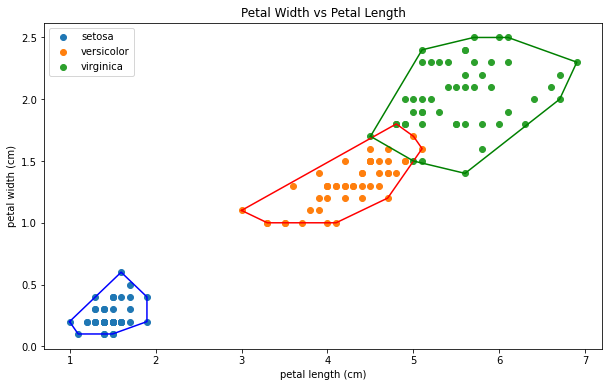

In [5]:
data_iris = datasets.load_iris()

# Membuat dataframe
df = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
df['Target'] = pd.DataFrame(data_iris.target)

# Visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))

plt.title('Petal Width vs Petal Length')
plt.xlabel(data_iris.feature_names[2])
plt.ylabel(data_iris.feature_names[3])

for i in range(len(data_iris.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    bucket = bucket.tolist()
    hull = ConvexHull(bucket)
    bucket = np.asarray(bucket)
    hull.append(hull[0])
    xs, ys = zip(*hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data_iris.target_names[i])
    plt.plot(xs, ys, colors[i])
    plt.legend()

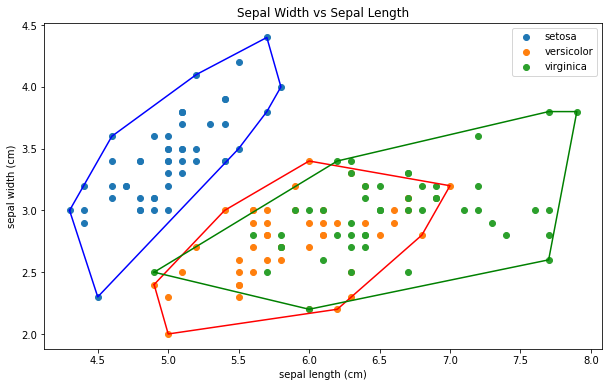

In [6]:
# Visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))

plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data_iris.feature_names[0])
plt.ylabel(data_iris.feature_names[1])

for i in range(len(data_iris.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucket = bucket.tolist()
    hull = ConvexHull(bucket)
    bucket = np.asarray(bucket)
    hull.append(hull[0])
    xs, ys = zip(*hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data_iris.target_names[i])
    plt.plot(xs, ys, colors[i])
    plt.legend()

# **DATASET** _digits_

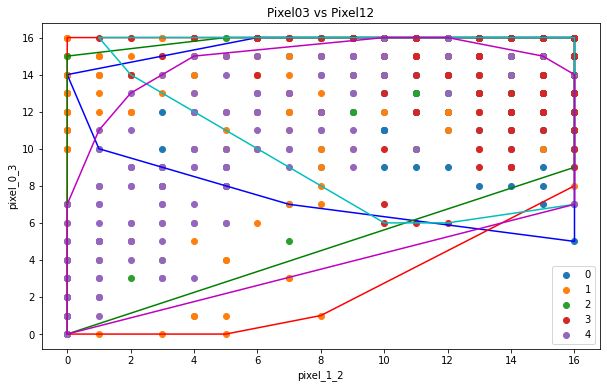

In [18]:
data_digits = datasets.load_digits()

# Membuat dataframe
df = pd.DataFrame(data_digits.data, columns=data_digits.feature_names)
df['Target'] = pd.DataFrame(data_digits.target)

# Visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))

plt.title('Pixel03 vs Pixel12')
plt.xlabel(data_digits.feature_names[10])
plt.ylabel(data_digits.feature_names[3])

for i in range(len(data_digits.target_names)-5):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[10,3]].values
    bucket = bucket.tolist()
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    bucket = np.asarray(bucket)
    hull.append(hull[0])
    xs, ys = zip(*hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data_digits.target_names[i])
    plt.plot(xs, ys, colors[i])
    plt.legend()


# **DATASET** _wine_

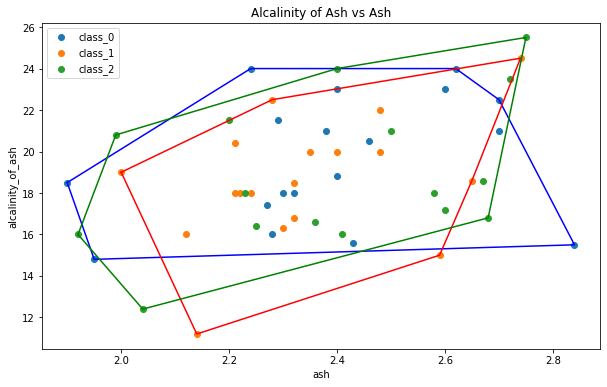

In [10]:
data_wine = datasets.load_wine()

# Membuat dataframe
df = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
df['Target'] = pd.DataFrame(data_digits.target)

# Visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))

plt.title('Alcalinity of Ash vs Ash')
plt.xlabel(data_wine.feature_names[2])
plt.ylabel(data_wine.feature_names[3])

for i in range(len(data_wine.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    bucket = bucket.tolist()
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    bucket = np.asarray(bucket)
    hull.append(hull[0])
    xs, ys = zip(*hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data_wine.target_names[i])
    plt.plot(xs, ys, colors[i])
    plt.legend()

# **DATASET** _breast cancer_

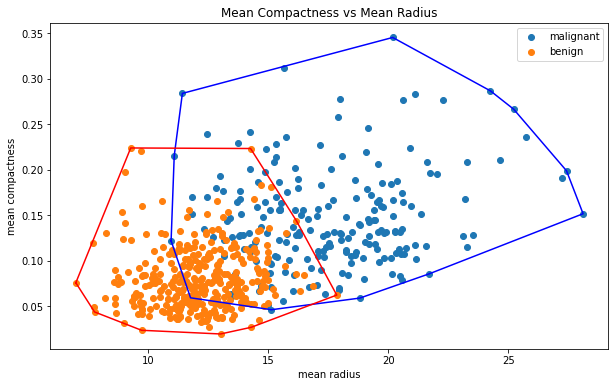

In [19]:
data_cancer = datasets.load_breast_cancer()

# Membuat dataframe
df = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df['Target'] = pd.DataFrame(data_cancer.target)

# Visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))

plt.title('Mean Compactness vs Mean Radius')
plt.xlabel(data_cancer.feature_names[0])
plt.ylabel(data_cancer.feature_names[5])

for i in range(len(data_cancer.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,5]].values
    bucket = bucket.tolist()
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    bucket = np.asarray(bucket)
    hull.append(hull[0])
    xs, ys = zip(*hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data_cancer.target_names[i])
    plt.plot(xs, ys, colors[i])
    plt.legend()